In [1]:
# A = "QO2 -> 3i -> LB -> 2j -> 1.0i+1.0j -> FS"
A = "3i -> 2j -> 1.0i+1.0j"

In [2]:
coms = A.split("->")
coms

['3i ', ' 2j ', ' 1.0i+1.0j']

In [3]:
def trayecto_a_vector(trayecto):
    trayecto = trayecto.replace(" ", "")
    componentes = trayecto.split("+")
    return componentes

In [4]:
trayecto_a_vector(coms[0])

['3i']

In [5]:
trayecto_a_vector(coms[1])

['2j']

In [6]:
trayecto_a_vector(coms[2])

['1.0i', '1.0j']

In [7]:
"3i"[0]

'3'

In [8]:
"3i"[-1]

'i'

In [9]:
"2.0i"[0:-1]

'2.0'

In [10]:
from numpy import array

In [11]:
a = array([0,0,0])
b = array([1,0,0])
3*(a + b)

array([3, 0, 0])

In [12]:
ejes = {"i":array([1,0,0]), "j":array([0,1,0]), "k":array([0,0,1])}
ejes["k"]

array([0, 0, 1])

In [13]:
def trayecto_a_vector(trayecto):
    '''
    Esta función toma como argumento una cadena de caracteres con el siguiente formato:
    "flotante1 i + flotante2 j + flotante3 k" en donde flotante puede ser un numero 
    entero o flotante e i, j y k se refieren a los vectores unitarios que generan un
    plano cartesiano.
    
    Esta función devolverá un vector con formato array de numpy en la dirección indicada
    por la cadena de caracteres.
    
    Ejemplo:
    >>> trayecto_a_vector("3i+2j")
    array([3., 2., 0.])
    
    '''
    from numpy import array
    
    trayecto = trayecto.replace(" ", "")
    componentes = trayecto.split("+")
    resultante = array([0,0,0])
    
    ejes = {"i":array([1,0,0]),
            "j":array([0,1,0]),
            "k":array([0,0,1])}
    
    for componente in componentes:
        resultante = resultante + float(componente[0:-1])*ejes[componente[-1]]
        
    return resultante

In [14]:
trayecto_a_vector(coms[0])

array([ 3.,  0.,  0.])

In [15]:
trayecto_a_vector(coms[1])

array([ 0.,  2.,  0.])

In [16]:
trayecto_a_vector(coms[2])

array([ 1.,  1.,  0.])

In [17]:
vecs = [trayecto_a_vector(trayecto) for trayecto in coms]
vecs

[array([ 3.,  0.,  0.]), array([ 0.,  2.,  0.]), array([ 1.,  1.,  0.])]

In [18]:
puntos = [array([0,0,0]), vecs[0], vecs[0] + vecs[1], vecs[0] + vecs[1] + vecs[2]]
puntos

[array([0, 0, 0]),
 array([ 3.,  0.,  0.]),
 array([ 3.,  2.,  0.]),
 array([ 4.,  3.,  0.])]

In [19]:
xs, ys, zs = array(puntos).T
xs, ys, zs

(array([ 0.,  3.,  3.,  4.]),
 array([ 0.,  0.,  2.,  3.]),
 array([ 0.,  0.,  0.,  0.]))

In [20]:
from matplotlib.pyplot import figure, plot, style
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

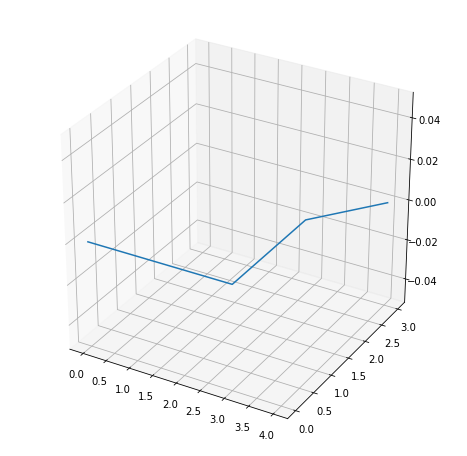

In [21]:
f1 = figure(figsize=(8, 8))
a1 = f1.add_subplot(111, projection='3d')
a1.plot(xs, ys, zs, "-");

In [22]:
B = "2k -> 3i -> 2j -> 1.0i+1.0j -> -1k"

In [23]:
coms2 = B.split("->")
vecs2 = [trayecto_a_vector(trayecto) for trayecto in coms2]
puntos2 = [array([0,0,0]),
          vecs2[0],
          vecs2[0] + vecs2[1],
          vecs2[0] + vecs2[1] + vecs2[2],
          vecs2[0] + vecs2[1] + vecs2[2] + vecs2[3],
          vecs2[0] + vecs2[1] + vecs2[2] + vecs2[3] + vecs2[4]]
xs, ys, zs = array(puntos2).T
puntos2

[array([0, 0, 0]),
 array([ 0.,  0.,  2.]),
 array([ 3.,  0.,  2.]),
 array([ 3.,  2.,  2.]),
 array([ 4.,  3.,  2.]),
 array([ 4.,  3.,  1.])]

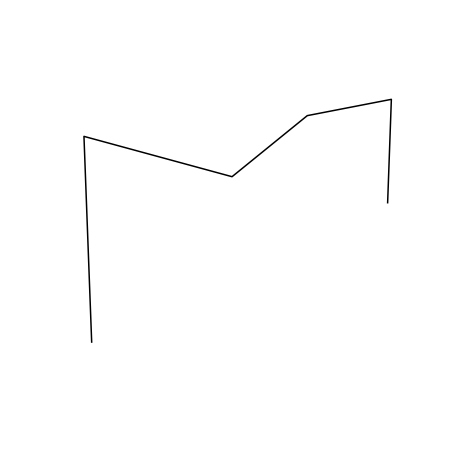

In [24]:
f2 = figure(figsize=(8, 8))
a2 = f2.add_subplot(111, projection='3d')
a2._axis3don = False
a2.plot(xs, ys, zs, "k-");

In [25]:
from matplotlib.patches import Circle, PathPatch, Rectangle
import mpl_toolkits.mplot3d.art3d as art3d

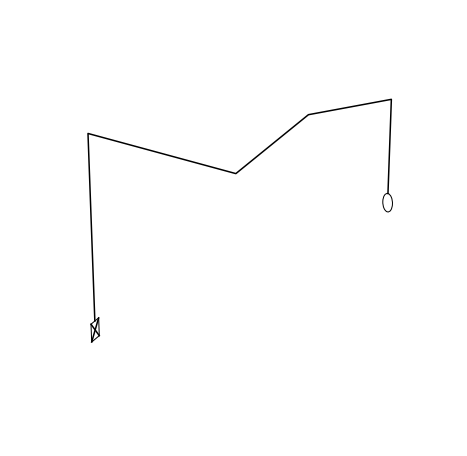

In [26]:
f3 = figure(figsize=(8, 8))
a3 = f3.add_subplot(111, projection='3d')
a3._axis3don = False
a3.plot(xs, ys, zs, "k-")

c = Circle((xs[-1], zs[-1]-0.1), 0.1, lw=1, ec="k", fc="w")
a3.add_patch(c)
art3d.pathpatch_2d_to_3d(c, z=ys[-1], zdir="y")

r = Rectangle((-0.1,-0.2), 0.2, 0.2, lw=1, ec="k", fc="w")
a3.add_patch(r)
art3d.pathpatch_2d_to_3d(r, z=0, zdir="x")
a3.plot([0,0], [-0.1, 0.1], [-0.2, 0], "k-")
a3.plot([0,0], [0.1, -0.1], [-0.2, 0], "k-");

In [27]:
def graf_trayectorias(especificacion):
    
    nodos_conocidos=["LB", "FS", "QO2"]
    
    especificacion = especificacion.replace(" ", "")
    grafo = especificacion.split("->")
    
    trayectorias = [elemento for elemento in grafo if elemento != "LB" and elemento != "FS" and elemento != "QO2"]
    return trayectorias

In [28]:
graf_trayectorias("QO2 -> 3i -> LB -> 2j -> 1.0i+1.0j -> FS")

['3i', '2j', '1.0i+1.0j']

In [29]:
graf_trayectorias("3i -> LB -> 2j -> 1.0i+1.0j -> FS")

['3i', '2j', '1.0i+1.0j']

In [30]:
graf_trayectorias("3i -> 2j -> 1.0i+1.0j -> FS")

['3i', '2j', '1.0i+1.0j']

In [31]:
graf_trayectorias("3i -> 2j -> 1.0i+1.0j")

['3i', '2j', '1.0i+1.0j']

In [32]:
def graf_trayectorias(especificacion):
    
    nodos_conocidos=["LB", "FS", "QO2"]
    
    especificacion = especificacion.replace(" ", "")
    grafo = especificacion.split("->")
    
    trayectorias = [elemento for elemento in grafo if elemento != "LB" and elemento != "FS" and elemento != "QO2"]
    vectores = [trayecto_a_vector(trayecto) for trayecto in trayectorias]
    return vectores

In [33]:
graf_trayectorias("QO2 -> 3i -> LB -> 2j -> 1.0i+1.0j -> FS")

[array([ 3.,  0.,  0.]), array([ 0.,  2.,  0.]), array([ 1.,  1.,  0.])]

In [34]:
A = [1,1,1]

In [35]:
type(A) is list

True

In [36]:
def vectores_a_nodos(vectores, acumulado=[array([0,0,0])]):
    """
    Esta función recursiva toma una lista de n vectores definidos como array
    de numpy y un vector inicial (por default el origen) y suma todas las
    coordenadas de a una, para obtener las coordenadas de la trayectoria
    definida en un array de dimension 3 x n.
    
    Ejemplo:
    vectores_a_nodos([array([0,0,1]), array([2,0,0]), array([0,1,0]), array([0,0,-1.5])], acumulado=[array([0,0,1.5])])
    >>> array([[ 0.,  0.,  1.5],
               [ 0.,  0.,  2.5],
               [ 2.,  0.,  2.5],
               [ 2.,  1.,  2.5],
               [ 2.,  1.,  1.]])
               
    """
    actual = acumulado[-1] + vectores[0]
    acumulado.append(actual)
    
    if len(vectores) > 1:
        acumulado = vectores_a_nodos(vectores[1:], acumulado)
        
    return array(acumulado)

In [37]:
vecs2

[array([ 0.,  0.,  2.]),
 array([ 3.,  0.,  0.]),
 array([ 0.,  2.,  0.]),
 array([ 1.,  1.,  0.]),
 array([ 0.,  0., -1.])]

In [38]:
puntos = vectores_a_nodos(vecs2, [array([0,0,0])])
puntos

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  2.],
       [ 3.,  0.,  2.],
       [ 3.,  2.,  2.],
       [ 4.,  3.,  2.],
       [ 4.,  3.,  1.]])

In [39]:
a = array([1,1,1])
type(a) is list

False

In [40]:
type([1,1])

list

In [41]:
def graf_trayectorias(especificacion):
    
    nodos_conocidos=["LB", "FS", "QO2"]
    
    especificacion = especificacion.replace(" ", "")
    grafo = especificacion.split("->")
    
    trayectorias = [elemento for elemento in grafo if elemento != "LB" and elemento != "FS" and elemento != "QO2"]
    vectores = [trayecto_a_vector(trayecto) for trayecto in trayectorias]
    
    puntos = vectores_a_nodos(vectores, [array([0,0,0])])
    xs, ys, zs = puntos.T
    max_dim = max([max(xs), max(ys), max(zs)])
    
    fig = figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax._axis3don = False
    ax.plot(xs, ys, zs, "k-");
    ax.set_xlim(0, max_dim*1.1);
    ax.set_ylim(0, max_dim*1.1);
    ax.set_zlim(0, max_dim*1.1);

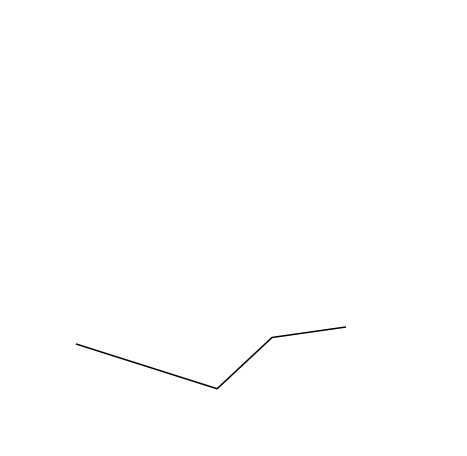

In [42]:
graf_trayectorias("QO2 -> 3i -> LB -> 2j -> 1.0i+1.0j -> FS")

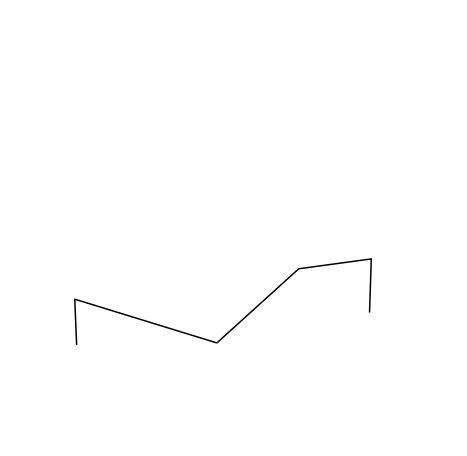

In [43]:
graf_trayectorias("QO2 -> 1k -> 3i -> LB -> 3j -> 1.0i+1.0j -> -1.2k -> FS")

In [44]:
("QO2 -> 1k -> 3i -> LB -> 3j -> LB -> 1.0i+1.0j -> -2k -> FS".replace(" ", "").split("->")).index("LB")

3

In [45]:
A = [1, 2, 3]

In [46]:
A.index(2)

1

In [106]:
def axisEqual3D(ax):
    
    from numpy import array, mean
    
    extents = array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    print(extents)
    sz = extents[:,1] - extents[:,0]
    centers = mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)

In [51]:
def graf_trayectorias(especificacion):
    
    from numpy import array
    from matplotlib.pyplot import figure
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.patches import Circle, PathPatch, Rectangle
    import mpl_toolkits.mplot3d.art3d as art3d
    
    nodos_conocidos=["LB", "FS", "QO2"]
    
    especificacion = especificacion.replace(" ", "")
    grafo = especificacion.split("->")
    
    trayectorias = [elemento for elemento in grafo if elemento != "LB" and elemento != "FS" and elemento != "QO2"]
    vectores = [trayecto_a_vector(trayecto) for trayecto in trayectorias]
    
    puntos = vectores_a_nodos(vectores, [array([0,0,0])])
    xs, ys, zs = puntos.T
    max_dim = max([max(xs), max(ys), max(zs)])
    
    fig = figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax._axis3don = False
    ax.plot(xs, ys, zs, "k-");
    axisEqual3D(ax);

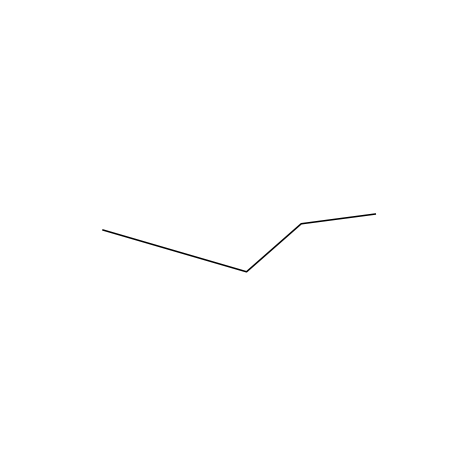

In [52]:
graf_trayectorias("QO2 -> 3i -> LB -> 2j -> 1.0i+1.0j -> FS")

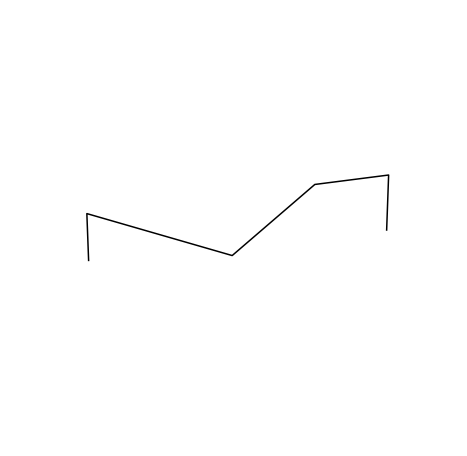

In [53]:
graf_trayectorias("QO2 -> 1k -> 3i -> LB -> 3j -> 1.0i+1.0j -> -1.2k -> FS")

In [187]:
def contacto(eje, x, y, z, plano):
    
    from matplotlib.patches import Circle, PathPatch
    import mpl_toolkits.mplot3d.art3d as art3d
    
    c = Circle((x, y), 0.1, lw=1, ec="k", fc="w")
    eje.add_patch(c)
    
    if plano == "xz":
        art3d.pathpatch_2d_to_3d(c, z=z, zdir="y")
    else:
        if plano == "xy":
            art3d.pathpatch_2d_to_3d(c, z=z, zdir="z")
        else:
            if plano == "yz":
                art3d.pathpatch_2d_to_3d(c, z=z, zdir="x")
                
def centro_carga(eje, x, y, z, plano):
    if plano == "xz":
        direccion  = "y"
        u,   v,  w = x, z, y
        Δu, Δv, Δw = 0.1, 0, 0.1
    else:
        if plano == "xy":
            direccion = "z"
            u, v, w = x, y, z
            Δu, Δv, Δw = 0.1, 0.1, 0
        else:
            if plano == "yz":
                direccion = "x"
                u, v, w = y, z, x
                Δu, Δv, Δw = 0, 0.1, 0.1
    
    from matplotlib.patches import Circle, PathPatch
    import mpl_toolkits.mplot3d.art3d as art3d
    
    r = Rectangle((u - 0.1, v - 0.1), 0.2, 0.2, lw=1, ec="k", fc="w")
    eje.add_patch(r)
    eje.plot([u - Δu, u + Δu], [v - Δv, v + Δv], [w - Δw, w + Δw], "k-")
    eje.plot([u + Δu, u - Δu], [v + Δv, v - Δv], [w - Δw, w + Δw], "k-")
    
    art3d.pathpatch_2d_to_3d(r, z=w, zdir=direccion)

In [220]:
def graf_trayectorias(especificacion, unidades="m"):
    
    from numpy import array, sqrt
    from matplotlib.pyplot import figure
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.patches import Circle, PathPatch, Rectangle
    import mpl_toolkits.mplot3d.art3d as art3d
    
    nodos_conocidos=["LB", "FS", "QO2"]
    
    especificacion = especificacion.replace(" ", "")
    grafo = especificacion.split("->")
    
    trayectorias = [elemento for elemento in grafo if elemento not in nodos_conocidos]
    vectores = [trayecto_a_vector(trayecto) for trayecto in trayectorias]
    magnitudes = [sqrt(vector.dot(vector)) for vector in vectores]
    acotaciones = ["{:.2f}".format(magnitud) + unidades for magnitud in magnitudes]
    posiciones_acotaciones = 
    print(acotaciones)
    
    puntos = vectores_a_nodos(vectores, [array([0,0,0])])
    xs, ys, zs = puntos.T
    max_dim = max([max(xs), max(ys), max(zs)])
    
    fig = figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax._axis3don = False
    ax.view_init(elev=30., azim=-45.)
    ax.plot(xs, ys, zs, "k-")
    contacto(ax, xs[-1], zs[-1], ys[-1], "xz")
    centro_carga(ax, ys[0], zs[0], xs[0], "yz")
    axisEqual3D(ax);

['1.00m', '3.00m', '3.00m', '1.41m', '1.20m']
[[-0.2    4.2  ]
 [-0.305  4.205]
 [-0.2    1.   ]]


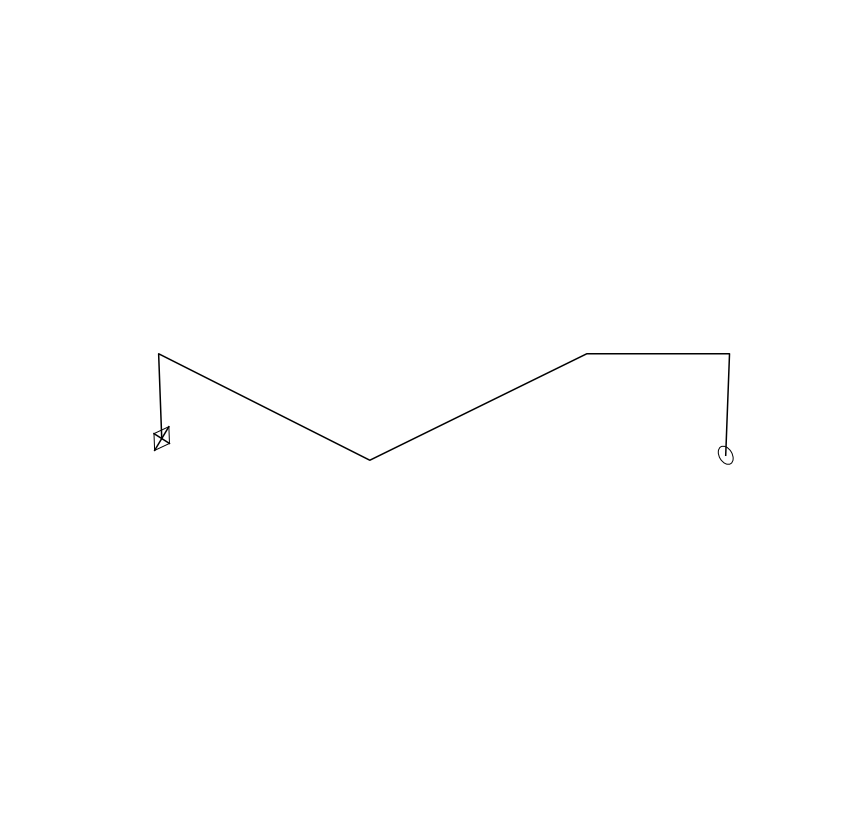

In [221]:
graf_trayectorias("QO2 -> 1k -> 3i -> LB -> 3j -> 1.0i+1.0j -> -1.2k -> FS", "m")

In [184]:
nodos_conocidos=["LB", "FS", "QO2"]
elemento = "Q"
elemento not in nodos_conocidos

True